In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE

In [3]:
emo=pd.read_csv("activities_with_emotion_labels_ruofei.csv")
emo.head()

,S6b_Other_Activities,Unnamed: 1,A1_Description,A2_Description,A3_Description,O1_other_group_name,Group_name_part1,PUSH_1,PULL_1,Emotion,S11a_Comments
0,"Working out, CBT, boxing",NaN,School,NaN,School,Other group,Group,Somebody got out of jail that brought a lot of...,School. work. moving,fear,"School. Poor grades, car accident, not enough ..."
1,Basketball,NaN,Basketball,NaN,NaN,No name,Money Gang,NaN,NaN,sadness,Mother died
2,Extra activities with children,NaN,"Church, job and school",Church choir and praise team,NaN,Church group,No group,NaN,NaN,fear,Favor cousin was murder and never found his ki...
3,Actor/dance,NaN,"Church, school and job",Church choir and praise team,NaN,No name,No name,NaN,NaN,sadness,Best friend brother was murder [sic] by 16 and...
4,Singing,NaN,"Church, job, and school",Church choir and praise team,NaN,No name,No name,NaN,NaN,sadness,Best fried brother was murder [sic] by 18yr boy


In [4]:
full=pd.read_csv('full_embeddedness.csv')

In [5]:
df = pd.merge(left=emo.drop_duplicates(), right=full.drop_duplicates(), on='ID', how='inner')

KeyError: 'ID'

In [6]:
df.loc[df1['S6b_Other_Activities'] == 'life-skills', 'S6b_Other_Activities'] = 'life-skils'

NameError: name 'df' is not defined

In [7]:
df.loc[df['S6b_Other_Activities'] == 'self-improvement', 'S6b_Other_Activities'] = 'selfimprovement'

NameError: name 'df' is not defined

In [8]:
df.loc[df['S6b_Other_Activities']== 'community service', 'S6b_Other_Activities'] = 'service'

NameError: name 'df' is not defined

In [9]:
df.loc[df['S6b_Other_Activities']== 'voala', 'S6b_Other_Activities'] = 'voa'

NameError: name 'df' is not defined

In [10]:
df.loc[df['S6b_Other_Activities']== 'reading', 'S6b_Other_Activities'] = 'read'

NameError: name 'df' is not defined

In [13]:
df.loc[df['S6b_Other_Activities']== 'studying', 'S6b_Other_Activities'] = 'study'

## Freq analysis

In [14]:
contents=df['S6b_Other_Activities'].dropna().values
contents


array(['workout, boxing', 'basketball', 'activities', ...,
       'Community service', 'cheerleading', 'basketball'], dtype=object)

In [15]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [16]:
for i in range (contents.shape[0]):
    contents[i]=contents[i].replace(",", " ")
contents

array(['workout  boxing', 'basketball', 'activities', ...,
       'Community service', 'cheerleading', 'basketball'], dtype=object)

In [17]:
all_contents = [''.join([c for c in i if c not in punctuation]) for i in contents]
all_contents = [i.lower() for i in all_contents]
all_one_contents=" ".join(all_contents)
contents_tokens = all_one_contents.split()

In [18]:
clean_tokens=contents_tokens

In [19]:
freq = nltk.FreqDist(clean_tokens)
freq

FreqDist({'gryd': 195, 'workout': 164, 'church': 150, 'job': 135, 'volunteer': 104, 'basketball': 95, 'hygiene': 80, 'football': 52, 'art': 48, 'community': 46, ...})

In [22]:
from collections import Counter
plot_dict = dict(Counter(freq).most_common(50))
plot_dict['read']=plot_dict['reading']+plot_dict['read']
plot_dict

{'gryd': 195,
 'workout': 164,
 'church': 150,
 'job': 135,
 'volunteer': 104,
 'basketball': 95,
 'hygiene': 80,
 'football': 52,
 'art': 48,
 'community': 46,
 'other': 45,
 'self': 43,
 'improvement': 43,
 'read': 62,
 'school': 38,
 'yes': 35,
 'lifeskills': 32,
 'sports': 31,
 'workshop': 29,
 'voa': 29,
 'work': 28,
 'program': 26,
 'counseling': 24,
 'selfimprovement': 24,
 'soccer': 22,
 'reading': 21,
 'service': 18,
 'boxing': 17,
 'parenting': 17,
 'study': 13,
 'family': 12,
 'entertainment': 11,
 'class': 10,
 'therapy': 10,
 'music': 10,
 'biking': 10,
 'uam': 9,
 'skating': 8,
 'bible': 7,
 'saprogram': 7,
 'girlsgroup': 7,
 'softball': 7,
 'mentored': 6,
 'genderworkshop': 5,
 'help': 5,
 'helper': 5,
 'religion': 5,
 'weed': 5,
 'activities': 4,
 'doctor': 4}

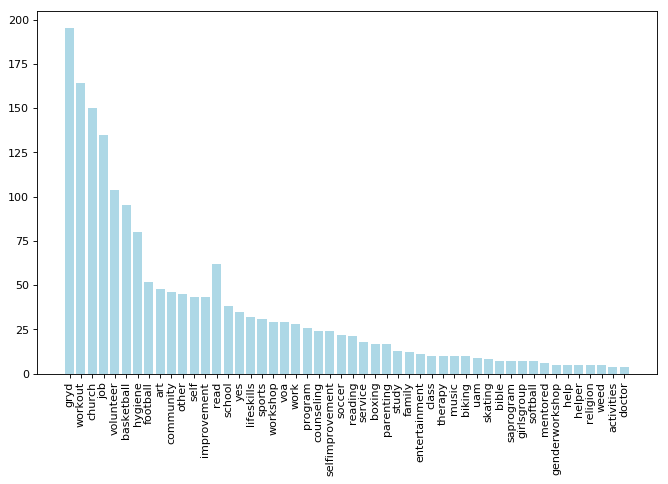

In [21]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(list(plot_dict.keys()), list(plot_dict.values()), color='lightblue')
plt.xticks(rotation=90)
plt.show()

## clustering

In [ ]:
content_list = list()
for i in all_contents:
    temp = i.split()
    content_list.append(" ".join([j for j in temp if j not in trash_tokens]))
len(content_list)

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(content_list)
X.shape

In [ ]:
pca = PCA(n_components=2, random_state=25)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

In [ ]:
distortions = []
K = range(3, 15)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=25).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# plot elbow method
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Finding optimal k using the elbow method')
plt.show()

In [ ]:
k = 8# number of clusters (may need to change)
model = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=1)
model.fit(X)

In [ ]:
print("Top terms in each cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :6]:
        print(' %s' % terms[ind]),
    print

print("\n")

In [ ]:
tsne = TSNE(verbose=1, perplexity=100, random_state=25)
X_embedded = tsne.fit_transform(X.toarray())

In [ ]:
import seaborn as sns
X_embedded_all = X_embedded
y_pred = model.fit_predict(X)
sns.set(rc={'figure.figsize':(10,10)})
palette = sns.hls_palette(k, l=.5, s=.8)

sns.scatterplot(X_embedded_all[:,0], X_embedded_all[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with {} clusters'.format(k))
plt.show()